<a href="https://colab.research.google.com/github/Madhuanabala/SET/blob/classification/classification_after_lipinsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00
Confusion Matrix:
[[39  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        17

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Total compounds classified: 521
Number of training samples: 416
Number of testing samples: 105


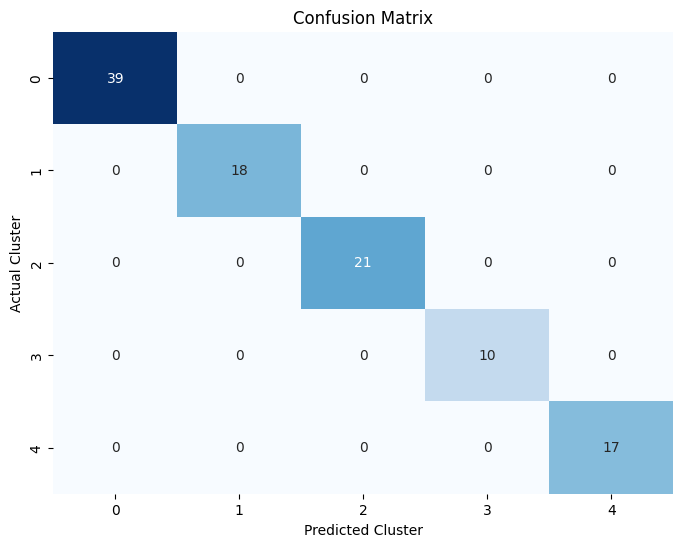

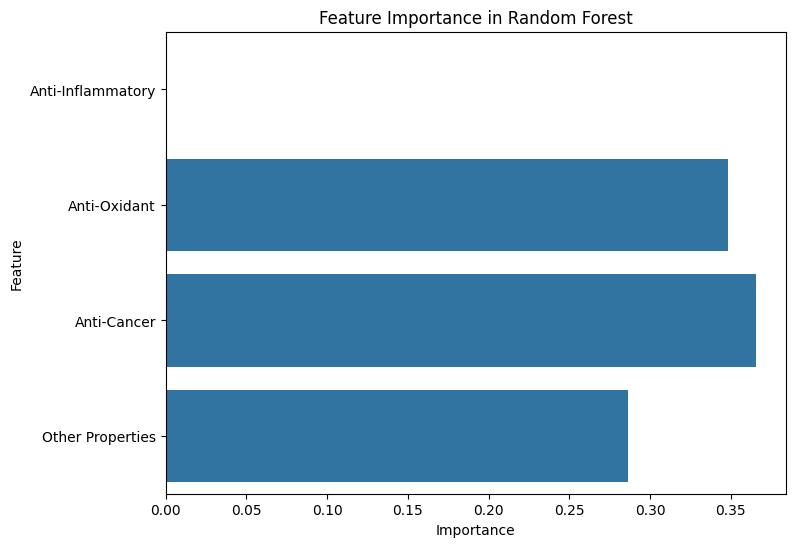

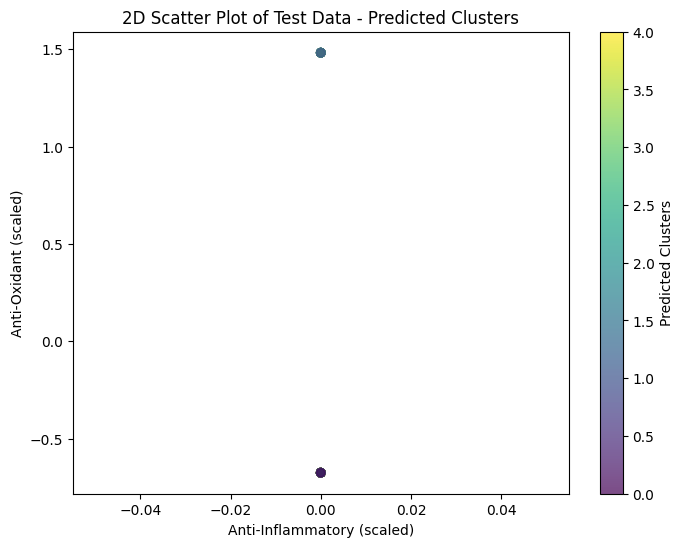

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        17

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



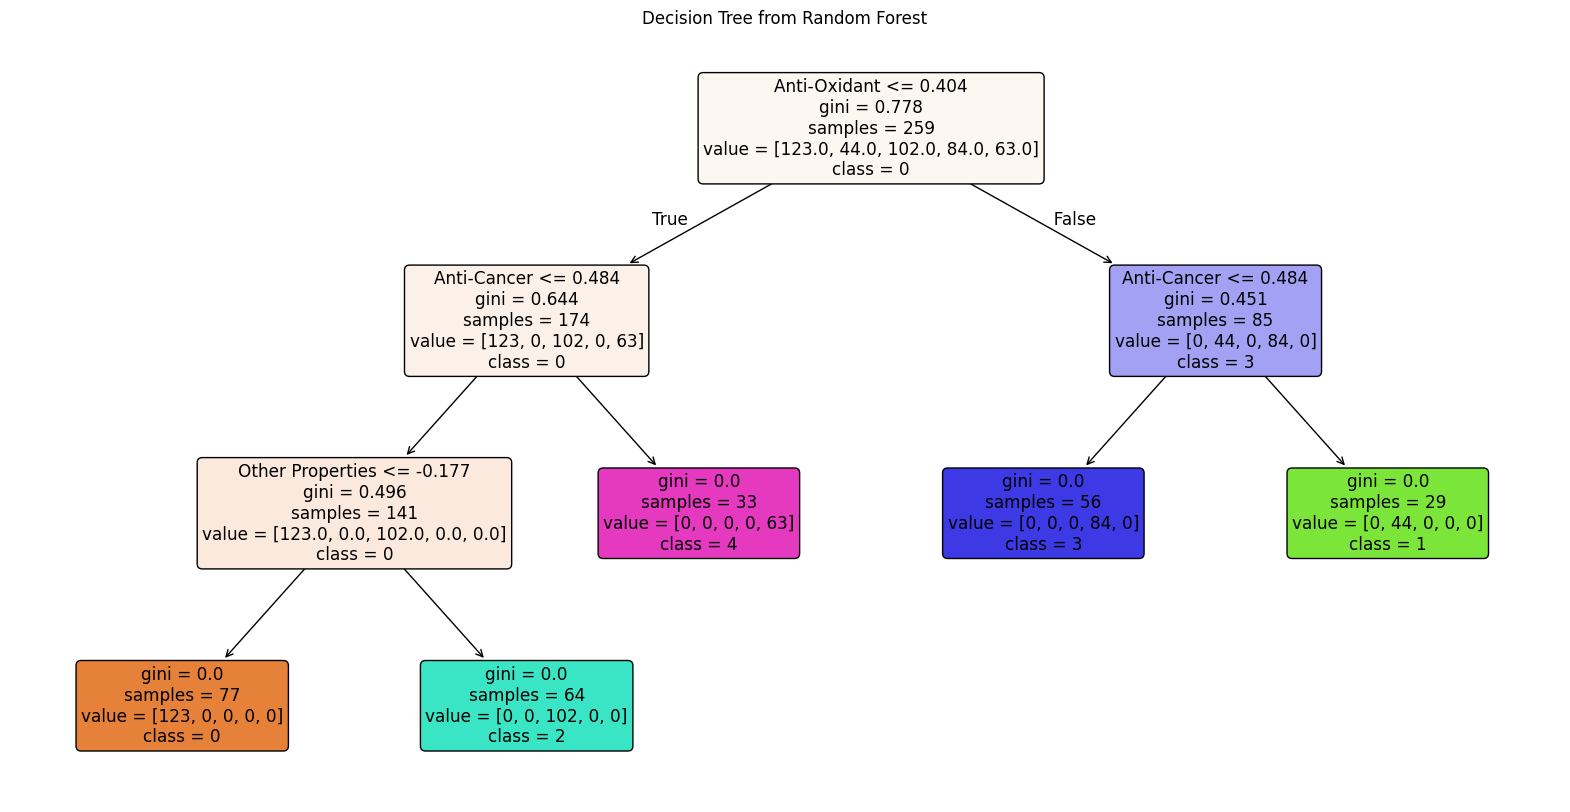

Classified data saved to output_classified_data.xlsx


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import os
file_path = '/content/after lipinksy.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
df.head()
feature_columns = ["Anti-Inflammatory", "Anti-Oxidant", "Anti-Cancer", "Other Properties"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_columns])
from sklearn.cluster import KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)
X = scaled_features
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
print(f'Total compounds classified: {len(df)}')
print(f'Number of training samples: {len(X_train)}')
print(f'Number of testing samples: {len(X_test)}')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Cluster')
plt.xlabel('Predicted Cluster')
plt.show()
importances = rf_model.feature_importances_
features = feature_columns
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Predicted Clusters')
plt.title('2D Scatter Plot of Test Data - Predicted Clusters')
plt.xlabel('Anti-Inflammatory (scaled)')
plt.ylabel('Anti-Oxidant (scaled)')
plt.show()
print('--- Classification Report ---')
print(class_report)
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.tree import plot_tree
tree = rf_model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=feature_columns, filled=True, rounded=True, class_names=[str(i) for i in set(y)])
plt.title('Decision Tree from Random Forest')
plt.show()
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature_columns,
                           class_names=[str(i) for i in set(y)],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
df['Predicted Cluster'] = rf_model.predict(scaled_features)
output_file = 'output_classified_data.xlsx'
df.to_excel(output_file, index=False)
print(f"Classified data saved to {output_file}")

